<a href="https://colab.research.google.com/github/wsbrito/DesafiosDIO/blob/main/Desafio_C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - Cálculo de Métricas de Avaliação de Aprendizado
### Autor: Wagner Brito

Abaixo segue a suloção proposta para o desafio da apresentação das métricas de avaliação de aprendizado de máquina.

## Código importado pronto que servirá de base para a apresentação das demais métricas
O código abaixo foi localizado através de uma busca simples no Goolgle. Como ele encerra na matriz de confusão decidi utilizá-lo como base para o desafio.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [3]:
from sklearn.model_selection import (cross_val_predict, KFold)
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(logistic,X,y,cv=KFold(n_splits=10, shuffle=True))
conf_mat = confusion_matrix(y,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


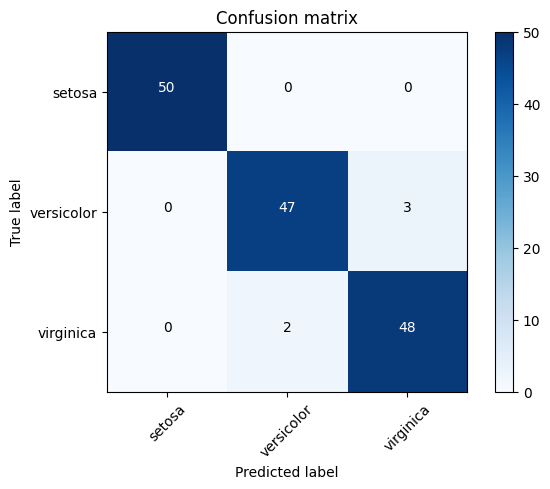

In [5]:
plot_confusion_matrix(conf_mat, list(iris.target_names))


## Total de exemplos

In [6]:
# Total de registros avaliados = 150
N = 150

## Execução dos cálculos das métricas

### Sensibilidade por classe
**Fórmula = Verdadeiro Positivo / (Verdadeiro Positivo + Falso Negativo)**

In [7]:
vp_setosa = conf_mat[0,0]
fn_setosa = conf_mat[0,1] + conf_mat[0,2]
sensibilidade_setosa = vp_setosa /(vp_setosa + fn_setosa)
print(sensibilidade_setosa)

1.0


In [8]:
vp_versicolor = conf_mat[1,1]
fn_versicolor = conf_mat[1,0] + conf_mat[1,2]
sensibilidade_versicolor = vp_versicolor /(vp_versicolor + fn_versicolor)
print(sensibilidade_versicolor)

0.94


In [9]:
vp_virginica = conf_mat[2,2]
fn_virginica = conf_mat[2,0] + conf_mat[2,1]
sensibilidade_virginica = vp_virginica /(vp_virginica + fn_virginica)
print(sensibilidade_virginica)

0.96


### Especificidade por classe
**Fórmula = Verdadeiro Negativo / (Falso Positivo + Verdadeiro Negativo)**

In [10]:
vn_setosa = conf_mat[1,1] + conf_mat[2,2]
fp_setosa = conf_mat[1,0] + conf_mat[2,0]
especificidade_setosa = vn_setosa / (fp_setosa + vn_setosa)
print(especificidade_setosa)

1.0


In [11]:
vn_versicolor = conf_mat[0,0] + conf_mat[2,2]
fp_versicolor = conf_mat[1,0] + conf_mat[1,2]
especificidade_versicolor = vn_versicolor / (fp_versicolor + vn_versicolor)
print(especificidade_versicolor)

0.9702970297029703


In [12]:
vn_virginica = conf_mat[0,0] + conf_mat[1,1]
fp_virginica = conf_mat[2,0] + conf_mat[2,1]
especificidade_virginica = vn_virginica / (fp_virginica + vn_virginica)
print(especificidade_virginica)

0.9797979797979798


## Acurácia Geral
**Fórmula = (Verdadeiro Positivo + Verdadeiro Negativo) / Total de Elementos**

In [13]:
acuracia_geral = (vp_setosa + vp_versicolor + vp_virginica)/N
print(acuracia_geral)

0.9666666666666667


## Acurácia por Classe
**Fórmula = (Verdadeiro Positivo + Verdadeiro Negativo) / Total de Elementos**

In [14]:
acuracia_setosa = (vp_setosa + vn_setosa) / N
print(acuracia_setosa)

0.9666666666666667


In [15]:
acuracia_versicolor = (vp_versicolor + vn_versicolor) / N
print(acuracia_versicolor)

0.9666666666666667


In [16]:
acuracia_virginica = (vp_virginica + vn_virginica) / N
print(acuracia_virginica)

0.9666666666666667


## Precisão por Classe
**Fórmula = Verdadeiro Positivo / (Verdadeiro Positivo + Falso Positivo)**

In [17]:
presisao_setosa = vp_setosa / (vp_setosa + fp_setosa)
print(presisao_setosa)

1.0


In [18]:
precisao_versicolor = vp_versicolor / (vp_versicolor + fp_versicolor)
print(precisao_versicolor)

0.94


In [19]:
precisao_virginica = vp_virginica / (vp_virginica + fp_virginica)
print(precisao_virginica)

0.96


## F1-score por classe
**Fórmula = 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)**

In [20]:
f1_setosa = 2 * (presisao_setosa * sensibilidade_setosa) / (presisao_setosa + sensibilidade_setosa)
print(f1_setosa)

1.0


In [21]:
f1_versicolor = 2 * (precisao_versicolor * sensibilidade_versicolor) / (precisao_versicolor + sensibilidade_versicolor)
print(f1_versicolor)

0.94


In [22]:
f1_verginica = 2 * (precisao_virginica * sensibilidade_virginica) / (precisao_virginica + sensibilidade_virginica)
print(f1_verginica)

0.96


## Curva de ROC

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Criando o array de exemplo
array = y_pred

# Reshape para que o OneHotEncoder funcione corretamente
array = np.array(array).reshape(-1, 1)

# Criando e aplicando o encoder
encoder = OneHotEncoder()
y_scores = encoder.fit_transform(array)

# Convertendo para array numpy
y_scores = y_scores.toarray()

#print(y_scores)

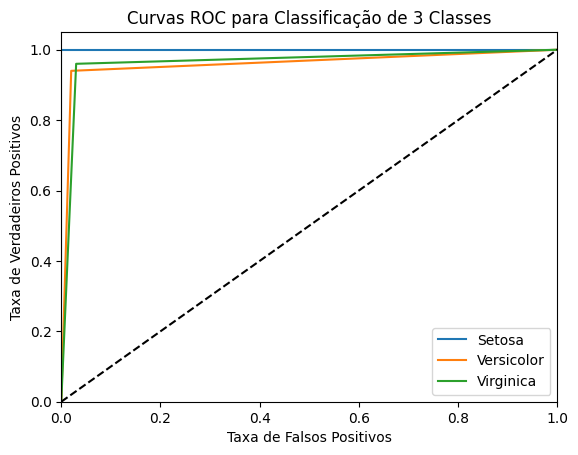

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Número de classes
n_classes = 3

# Inicializando dicionários para armazenar TPR, FPR e AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculando a curva ROC para cada classe (OvR)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando as curvas ROC
plt.figure()
for i in range(n_classes):
    #plt.plot(fpr[i], tpr[i], label='Classe %d (AUC = %0.2f)' % (i, roc_auc[i]))
    if(i == 0):
        plt.plot(fpr[i], tpr[i], label='Setosa')
    elif(i == 1):
        plt.plot(fpr[i], tpr[i], label='Versicolor')
    else:
        plt.plot(fpr[i], tpr[i], label='Virginica')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
## Título mais específico para o problema de 3 classes
plt.title('Curvas ROC para Classificação de 3 Classes')
plt.legend(loc="lower right")
plt.show()